# Accessing the `pyHalo` subhalo realizations

This notebook demonstrates how to work with the subhalo realizations from `pyHalo`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import tarfile
from glob import glob
from pprint import pprint

# Untar the subhalos

Make sure to update the filepath in the block below!

Unzip the file however you'd like. The Python command below might take a while to run (up to 15 minutes). You may find that the commented `tar` command is quicker.

In [2]:
targz_filepath = '/data/bwedig/mejiro/h5_export/subhalos_v_1_0_0.tar.gz'  # TODO update this path!
parent_dir = os.path.dirname(targz_filepath)

# !tar -xzf $targz_filepath

with tarfile.open(targz_filepath, 'r:gz') as tar:
    tar.extractall(path=parent_dir)

We now have a directory `subhalos` in the directory where the `.tar.gz` file lives. Within that folder are `.pkl` files for the subhalo realizations.

# Deserialize using `pickle`

We'll retrieve the subhalo realization for the system in the `view_dataset` notebook

In [3]:
subhalo_pickles = sorted(glob(os.path.join(parent_dir, 'subhalos', 'subhalo_realization_*.pkl')))
print(f'Found {len(subhalo_pickles)} subhalo realization(s)')

Found 16214 subhalo realization(s)


In [4]:
subhalo_pickle = glob(os.path.join(parent_dir, 'subhalos', f'subhalo_realization_{str(14).zfill(8)}.pkl'))[0]

with open(subhalo_pickle, 'rb') as f:
    subhalo_realization = pickle.load(f)

# Use `pyHalo` to study the subhalo population

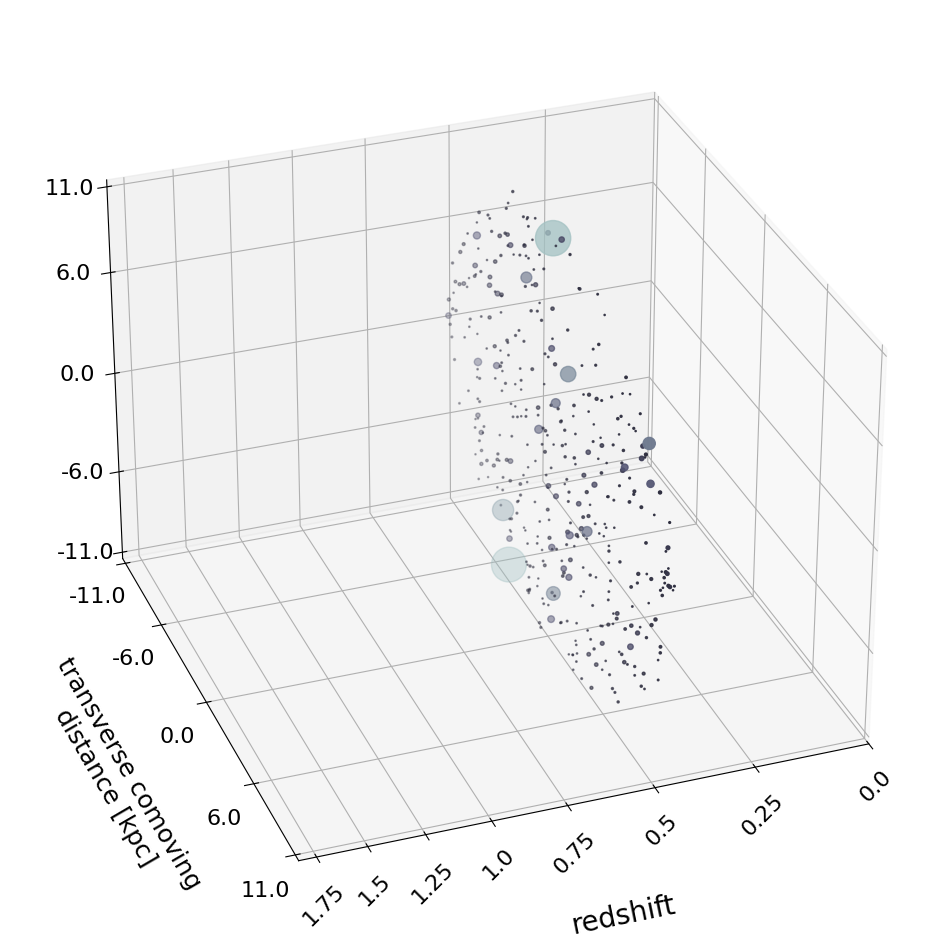

In [5]:
f = plt.figure(figsize=(14, 12))
ax = f.add_subplot(111, projection='3d')
subhalo_realization.plot(ax)

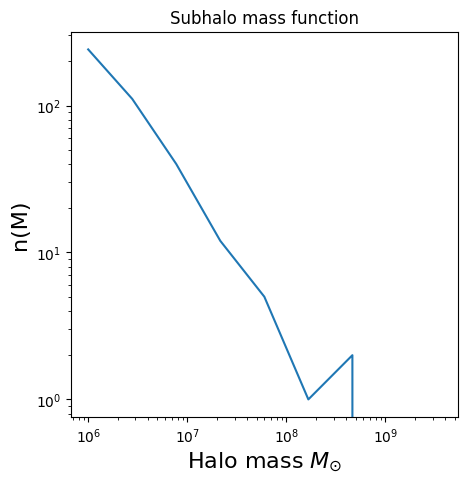

In [6]:
cdm_halo_masses = [halo.mass for halo in subhalo_realization.halos]
N, m = np.histogram(cdm_halo_masses, bins=np.logspace(6, 10, 10))

f, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.loglog(m[0:-1], N)
ax.set_xlabel('Halo mass ' + r'$M_{\odot}$', fontsize=16)
ax.set_ylabel('n(M)', fontsize=16)
ax.set_title('Subhalo mass function')
plt.show()

# Retrieve parameters of an individual subhalo

We'll look at the details of the most massive subhalo

In [7]:
largest_halo = max(subhalo_realization.halos, key=lambda halo: halo.mass)
print(f'Largest halo has mass {largest_halo.mass:.2e} Msun\n')

pprint(largest_halo.__dict__)

Largest halo has mass 8.51e+08 Msun

{'_args': {},
 '_c': 2.5584228876836144,
 '_concentration_class': <pyHalo.Halos.concentration.ConcentrationDiemerJoyce object at 0x7fbc90944be0>,
 '_kwargs_lenstronomy': [{'Rs': 1.0646933726,
                          'alpha_Rs': 0.0017844564,
                          'center_x': -0.0619,
                          'center_y': 1.2802,
                          'r_trunc': 0.04894547752514928}],
 '_lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7fbc909445e0>,
 '_profile_args': (2.5584228876836144, 0.301358136747673),
 '_rescale_norm': 1.0,
 '_rescaled_once': False,
 '_time_since_infall': 8.183390306404586,
 '_truncation_class': <pyHalo.Halos.tidal_truncation.TruncationGalacticus object at 0x7fbc90944f70>,
 '_z_infall': 8.67072914046944,
 '_zeval': 8.67072914046944,
 'fixed_position': False,
 'is_subhalo': True,
 'lens_cosmo': <pyHalo.Halos.lens_cosmo.LensCosmo object at 0x7fbc909445e0>,
 'mass': 850960215.5974643,
 'mdef': 'TNFW',
 'r3d':